In [2]:
pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.0 MB 5.6 MB/s eta 0:00:02
   ----- ---------------------------------- 1.6/11.0 MB 7.6 MB/s eta 0:00:02
   ----------------- ---------------------- 4.7/11.0 MB 8.6 MB/s eta 0:00:01
   ------------------------- -------------- 7.1/11.0 MB 9.5 MB/s eta 0:00:01
   ---------------------------------- ----- 9.4/11.0 MB 9.8 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 9.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   - -------------------------------------- 2.1/44.5 MB 11.8 MB/s eta 0:00:04
   --- ------------------------------------ 4.2/44.5 MB 10.5 MB/s eta 0:00:04
   ----- ---------------------------------- 6.3/44.5 MB 10.2 MB/s eta 0:00:04
   ------- -------------------------------- 8.1/44.5 MB 10.1 MB/s eta 0:00:04
   --------- ------------------------------ 10.2/44.5 MB 9.8 MB/s eta 0:00:04
   ---

# Анализ датасета Ирис
Этот ноутбук выполняет несколько этапов анализа данных для набора данных "Ирис". Мы используем `numpy` и `scikit-learn` для загрузки данных, обработки и классификации, а также `pandas` для сохранения результатов в файл.

## Шаг 1: Загрузка и подготовка данных
В этом шаге мы загружаем набор данных Ирис, который встроен в библиотеку `scikit-learn`. Мы выделяем признаки и метки в отдельные переменные и проверяем их размеры.

In [19]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# Загружаем датасет
iris = load_iris()
data = iris.data  # Признаки, размер (150, 4)
target = iris.target  # Метки (названия ирисов), размер (150,)

# Проверяем размерность массива признаков и меток
print(f"Размер матрицы признаков (data): {data.shape}")  # Должен быть (150, 4)
print(f"Размер вектора меток (target): {target.shape}")  # Должен быть (150,)

Размер матрицы признаков (data): (150, 4)
Размер вектора меток (target): (150,)


## Шаг 2: Сохранение данных в CSV
Чтобы соответствовать заданию по предоставлению файла с данными, мы сохраняем датасет в файл `iris_dataset.csv`, который содержит признаки и метки.

In [20]:
# Сохраняем датасет в CSV файл, если это требуется
df = pd.DataFrame(data, columns=iris.feature_names)
df['target'] = target  # Добавляем колонку с метками
df.to_csv('iris_dataset.csv', index=False)
print("Файл 'iris_dataset.csv' успешно сохранен.")

Файл 'iris_dataset.csv' успешно сохранен.


## Шаг 3: Оценка занимаемого объема памяти
Теперь мы вычисляем объем памяти, занимаемый матрицей признаков и вектором меток, используя атрибут `nbytes`.

In [21]:
# Смотрим, сколько места занимает массив данных и меток
data_size = data.nbytes  # размер данных в байтах
target_size = target.nbytes  # размер меток в байтах

print(f'Размер матрицы признаков: {data_size} байт')
print(f'Размер вектора меток: {target_size} байт')

Размер матрицы признаков: 4800 байт
Размер вектора меток: 1200 байт


## Шаг 4: Нормализация данных
На этом шаге мы нормализуем признаки (каждый столбец) в диапазон от 0 до 1. Это улучшает качество модели и помогает избежать проблем с масштабированием.

In [22]:
# Нормализуем данные по каждому столбцу отдельно
data_min = data.min(axis=0)
data_max = data.max(axis=0)
data_normalized = (data - data_min) / (data_max - data_min)

print("Нормализованные данные:\n", data_normalized[:5])  # Вывод первых 5 строк для проверки

Нормализованные данные:
 [[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]


## Шаг 5: Преобразование признака в категориальную переменную
Теперь представим один из признаков (например, первый) как категориальную переменную, используя квантили. Мы делим значения на три категории: `small`, `medium` и `big`.

In [23]:
# Берем первый признак
feature = data_normalized[:, 0]

# Определяем границы квантилей
q25, q75 = np.percentile(feature, [25, 75])

# Создаем категориальную переменную
categories = np.where(feature < q25, 'small', 
                      np.where(feature > q75, 'big', 'medium'))

print("Категориальные данные для первого признака:\n", categories[:10])  # Выводим первые 10

Категориальные данные для первого признака:
 ['medium' 'small' 'small' 'small' 'small' 'medium' 'small' 'small' 'small'
 'small']


## Шаг 6: Разделение на тренировочную и тестовую выборки
Мы делим данные на обучающую и тестовую выборки, используя пропорцию 80% на 20%, для обучения и оценки модели.

In [24]:
from sklearn.model_selection import train_test_split

# Разделяем данные (0.8 для обучения, 0.2 для тестирования)
X_train, X_test, y_train, y_test = train_test_split(data_normalized, target, test_size=0.2, random_state=42)

print(f'Размер обучающей выборки: {X_train.shape[0]}')
print(f'Размер тестовой выборки: {X_test.shape[0]}')

Размер обучающей выборки: 120
Размер тестовой выборки: 30


## Шаг 7: Обучение модели классификации и оценка точности
В этом шаге мы обучаем классификатор `SVC` (Support Vector Classifier) на тренировочной выборке и оцениваем точность на тестовой выборке.

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Создаем и обучаем классификатор
model = SVC()
model.fit(X_train, y_train)

# Предсказываем и оцениваем точность
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Точность классификации: {accuracy:.2f}')

Точность классификации: 1.00


## Шаг 8: Эксперименты с гиперпараметрами
Мы проведем три эксперимента с изменением гиперпараметров модели `SVC`, чтобы увидеть, как это влияет на точность. 

In [26]:
# 1. Изменение гиперпараметра C
model_1 = SVC(C=0.1)
model_1.fit(X_train, y_train)
y_pred_1 = model_1.predict(X_test)
accuracy_1 = accuracy_score(y_test, y_pred_1)

# 2. Изменение ядра на линейное
model_2 = SVC(kernel='linear')
model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_test)
accuracy_2 = accuracy_score(y_test, y_pred_2)

# 3. Использование данных без нормализации
model_3 = SVC()
model_3.fit(X_train * (data_max - data_min) + data_min, y_train)
y_pred_3 = model_3.predict(X_test * (data_max - data_min) + data_min)
accuracy_3 = accuracy_score(y_test, y_pred_3)

print(f'Точность модели с C=0.1: {accuracy_1:.2f}')
print(f'Точность модели с линейным ядром: {accuracy_2:.2f}')
print(f'Точность модели с ненормализованными данными: {accuracy_3:.2f}')

Точность модели с C=0.1: 1.00
Точность модели с линейным ядром: 1.00
Точность модели с ненормализованными данными: 1.00


## Шаг 9: Визуализация данных с использованием PCA и t-SNE
Мы уменьшим размерность данных до 2D, используя методы PCA и t-SNE, чтобы построить графики распределения данных с исходными и предсказанными метками.

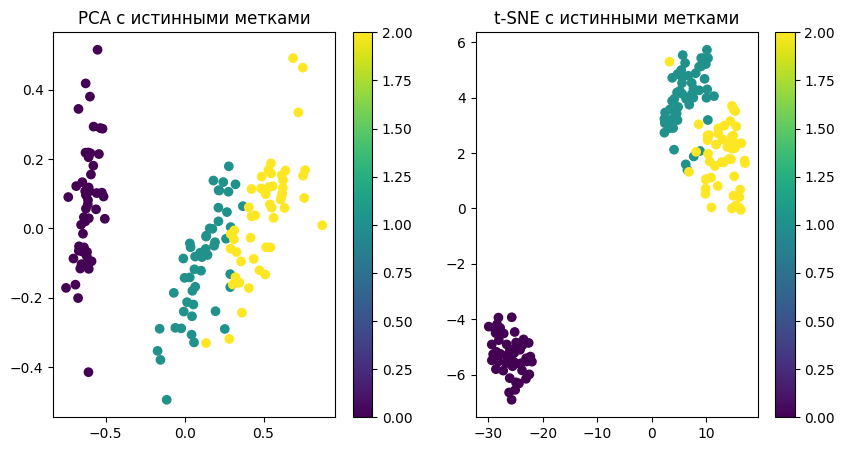

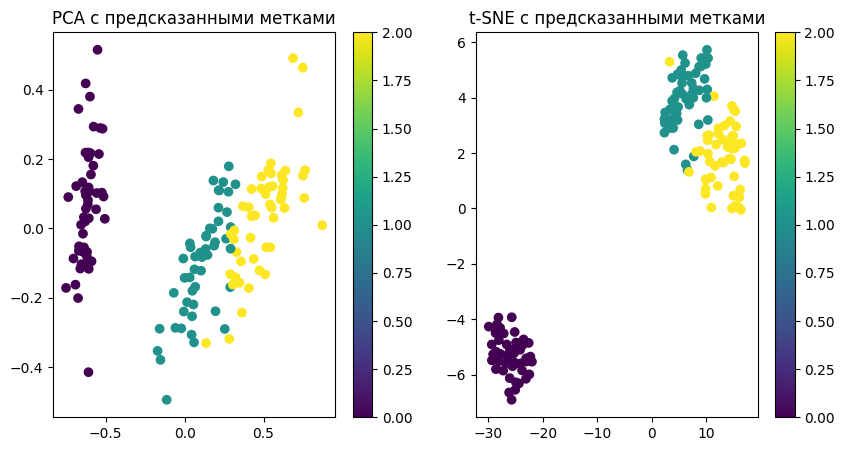

In [27]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Преобразуем данные в 2D с помощью PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_normalized)

# Преобразуем данные в 2D с помощью t-SNE
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_normalized)

# Визуализация PCA с истинными метками
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=target, cmap='viridis')
plt.title('PCA с истинными метками')
plt.colorbar()

# Визуализация t-SNE с истинными метками
plt.subplot(1, 2, 2)
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=target, cmap='viridis')
plt.title('t-SNE с истинными метками')
plt.colorbar()
plt.show()

# Теперь визуализация с предсказанными метками
y_pred_all = model.predict(data_normalized)  # предсказание на всех данных

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=y_pred_all, cmap='viridis')
plt.title('PCA с предсказанными метками')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=y_pred_all, cmap='viridis')
plt.title('t-SNE с предсказанными метками')
plt.colorbar()
plt.show()